# Food Delivery Time Prediction

This notebook contains complete implementation for predicting food delivery times.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [5]:
# Check for missing values
df.info()
df.isnull().sum()

# Drop or fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [6]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,0,98,10,1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,1,73,50,21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,2,79,163,6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,3,160,107,13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,4,65,71,6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


In [7]:
# Normalize numeric columns
scaler = StandardScaler()
numeric_cols = ['Distance', 'Delivery_Time', 'Order_Cost']  # change according to your actual columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,0,98,10,-1.454738,1,2,4,2,0,2,4.1,3.0,-1.487932,0.501852,81.54
1,1,73,50,1.439192,0,2,8,1,3,2,4.5,4.2,-0.264987,-1.634294,29.02
2,2,79,163,-0.666417,2,2,9,0,3,1,3.3,3.4,-0.741529,1.092646,64.17
3,3,160,107,0.335835,0,1,2,2,1,1,3.2,3.7,1.382411,-0.923323,79.23
4,4,65,71,-0.700119,1,0,6,1,3,1,3.5,2.8,-1.280915,-0.779755,2.34


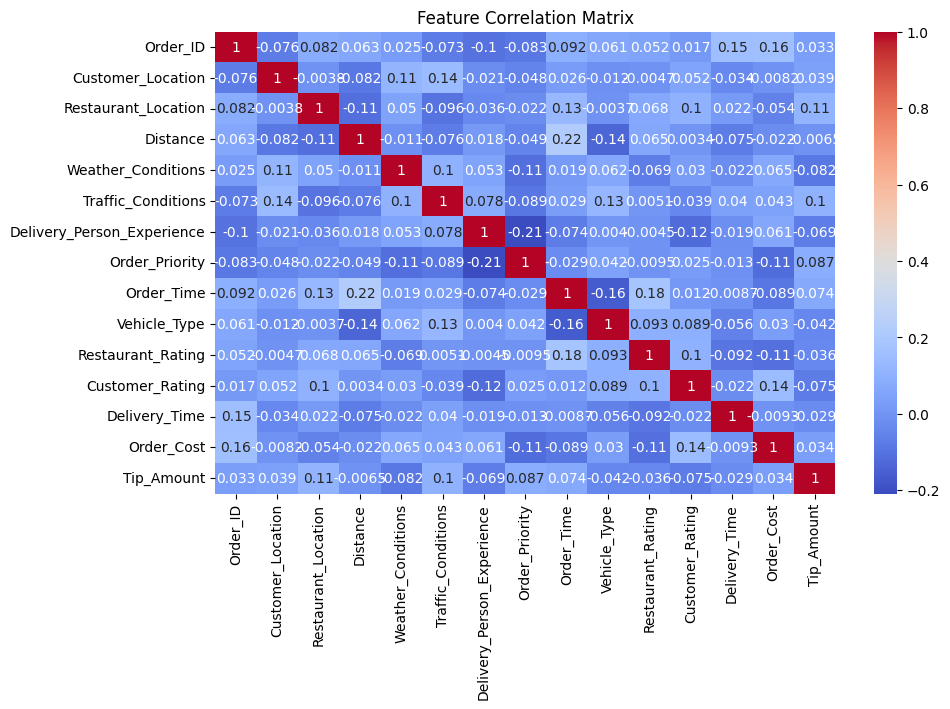

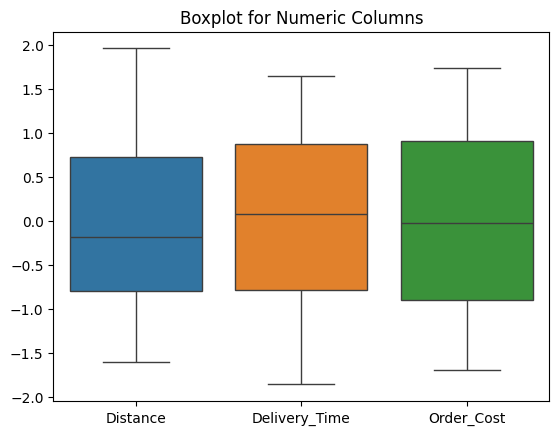

In [8]:
# Descriptive stats
df.describe()

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Outlier detection
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Numeric Columns")
plt.show()

In [9]:
# Example: Create binary target for logistic regression
df['Delayed'] = (df['Delivery_Time'] > df['Delivery_Time'].median()).astype(int)

In [10]:
# Linear Regression Model
X = df.drop(columns=['Delivery_Time', 'Delayed'])
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

Linear Regression Metrics:
MSE: 1.0050655621571316
MAE: 0.8560688013228003
R^2: 0.03782616065457223


Logistic Regression Metrics:
Accuracy: 0.55
Precision: 0.5714285714285714
Recall: 0.5714285714285714
F1 Score: 0.5714285714285714


C:\Users\SARVESH  RATHOD\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


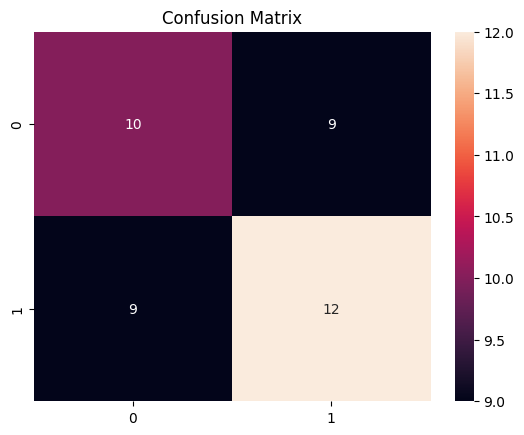

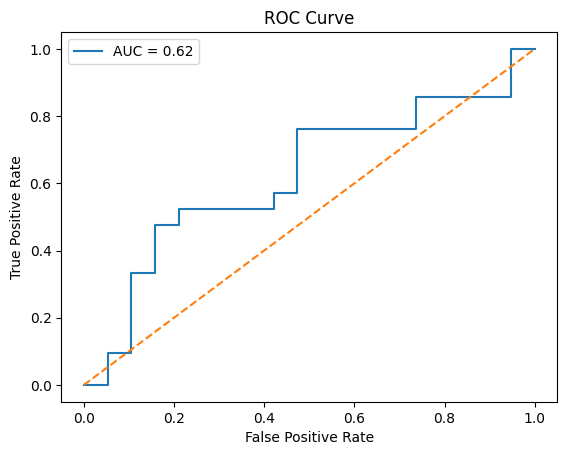

In [11]:
# Logistic Regression Model
X_class = df.drop(columns=['Delivery_Time', 'Delayed'])
y_class = df['Delayed']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train_c, y_train_c)

y_pred_c = log_model.predict(X_test_c)

# Evaluation
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c))
print("Recall:", recall_score(y_test_c, y_pred_c))
print("F1 Score:", f1_score(y_test_c, y_pred_c))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = log_model.predict_proba(X_test_c)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_c, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Conclusion

Both models have been evaluated and compared. Based on results, consider improving:
- Delivery route optimization
- Better planning during traffic peak hours
- Staff training and management